In [545]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from pandas_datareader import data as pdr
pd.options.display.float_format = '{:,}'.format
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [546]:
t = yf.Ticker('msft')

In [547]:
df = pd.DataFrame.from_dict(t.info.items())
df = df.rename(columns={0: "Financials", 1: "Fundamentals"})
#np.array(df['Financials'])

In [548]:
df1 = df[df['Financials'].isin([
    'longName',
    'symbol',
    'profitMargins',
    'grossMargins',
    'operatingMargins',
     'returnOnEquity',
    'returnOnAssets',
    'priceToSalesTrailing12Months',
    'pegRatio',
    'priceToBook',
    'trailingEps',
    'trailingPE',
    'revenuePerShare',
    'totalCashPerShare',
    'earningsGrowth',
    'revenueGrowth',
     'fiftyTwoWeekHigh',
    'fiftyTwoWeekLow',
    'targetHighPrice',
     'currentPrice',
    'threeYearAverageReturn',
    'fiveYearAverageReturn',
    'fiftyDayAverage',
    'currentPrice',
    'ytdReturn'
    'currentRatio',
    'totalCash',
    'totalDebt',
    'quickRatio',
    'marketCap',
    'dividendYield',
    'enterpriseValue',
    'enterpriseToEbitda',
    'ebitda','totalCashPerShare'
    ])]

In [549]:
t.major_holders

# Balance Sheet

In [550]:
d=t.balance_sheet.reset_index()
d = d[d['index'].isin(['Total Liab','Total Assets','Total Stockholder Equity'])]
d= d.iloc[:,:2]
d.columns = ['Financials','Fundamentals']
df1 = pd.concat([df1,d]).reset_index(drop=True)

In [551]:
f=t.balance_sheet.reset_index()
f = f[f['index'].isin(['Total Liab','Total Assets','Total Stockholder Equity'])]
f = f.set_index('index')
f = f/1000000
fp = round((f.pct_change(axis=1,periods=-1)*100),2).rename(index={'Total Liab': 'Total Liab pct_chg',
                                                                 'Total Stockholder Equity': 'Total Stockholder Equity pct_chg',
                                                                 'Total Assets': 'Total Assets pct_chg'})
round(f.append(fp).sort_index().astype('float'),2)

,2021-06-30 00:00:00,2020-06-30 00:00:00,2019-06-30 00:00:00,2018-06-30 00:00:00
index,,,,
Total Assets,"333,779.0","301,311.0","286,556.0","258,848.0"
Total Assets pct_chg,10.78,5.15,10.7,NaN
Total Liab,"191,791.0","183,007.0","184,226.0","176,130.0"
Total Liab pct_chg,4.8,-0.66,4.6,NaN
Total Stockholder Equity,"141,988.0","118,304.0","102,330.0","82,718.0"
Total Stockholder Equity pct_chg,20.02,15.61,23.71,NaN


In [552]:
bs = t.get_balancesheet()/1000000

In [553]:
#quick Ration
qr=round((t.get_balancesheet().filter(items = ['Total Current Assets'], axis=0).values-t.get_balancesheet().filter(items = ['Inventory'], axis=0).values)/t.get_balancesheet().filter(items = ['Total Current Liabilities'], axis=0)*100,2)
qr = qr.rename(index={'Total Current Liabilities': 'Quick Ratio'})
bs = bs.append(qr)

# Earnings

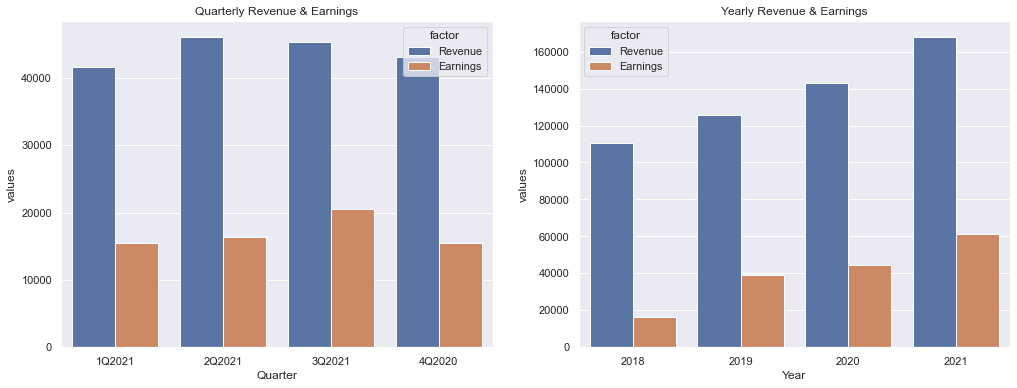

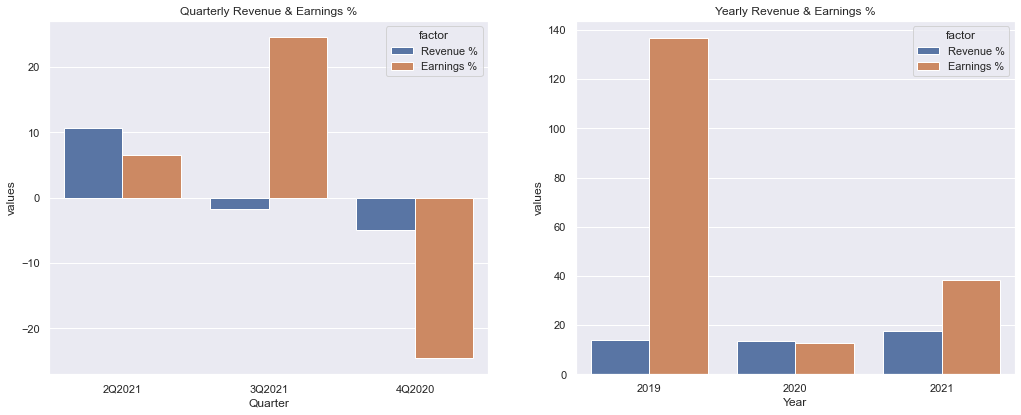

In [554]:
e = t.earnings/1000000
e2 = round((e.pct_change(axis=0,)*100),2)
e = pd.merge(e,e2,left_index=True,right_index=True).rename(columns={'Revenue_y': 'Revenue %','Earnings_y': 'Earnings %','Revenue_x': 'Revenue','Earnings_x': 'Earnings'})

re = e[['Revenue','Earnings']].stack().reset_index().rename(columns={'level_1': 'factor', 0: 'values'})

eq = t.quarterly_earnings/1000000
eq=eq.sort_values('Quarter')
eq2 = round((eq.pct_change(axis=0,)*100),2)
eq2 = pd.merge(eq,eq2,left_index=True,right_index=True).rename(columns={'Revenue_y': 'Revenue %','Earnings_y': 'Earnings %','Revenue_x': 'Revenue','Earnings_x': 'Earnings'})

req = eq2[['Revenue','Earnings']].stack().reset_index().rename(columns={'level_1': 'factor', 0: 'values'})

fig, axs = plt.subplots(ncols=2,figsize=(17,6))

ax = sns.barplot(hue='factor',x='Quarter',y='values',data=req,ax=axs[0])
ax.set_title('Quarterly Revenue & Earnings')
#sns.set(rc={'figure.figsize':(15,4)})

bx = sns.barplot(hue='factor',x='Year',y='values',data=re,ax=axs[1])
bx.set_title('Yearly Revenue & Earnings')
#sns.set(rc={'figure.figsize':(15,4)})


rep = e[['Revenue %','Earnings %']].stack().reset_index().rename(columns={'level_1': 'factor', 0: 'values'})

reqp = eq2[['Revenue %','Earnings %']].stack().reset_index().rename(columns={'level_1': 'factor', 0: 'values'})

fig, axs = plt.subplots(ncols=2,figsize=(17.3,6.5))

ax = sns.barplot(hue='factor',x='Quarter',y='values',data=reqp,ax=axs[0])
ax.set_title('Quarterly Revenue & Earnings %')
#sns.set(rc={'figure.figsize':(15,4)})

bx = sns.barplot(hue='factor',x='Year',y='values',data=rep,ax=axs[1])
bx.set_title('Yearly Revenue & Earnings %')
#sns.set(rc={'figure.figsize':(15,4)})



plt.show()

# Income Statement

In [555]:
fin =t.financials/1000000
fin2= fin
fin2['avg']=fin2.sum(axis=1)/4
fin2

,2021-06-30 00:00:00,2020-06-30 00:00:00,2019-06-30 00:00:00,2018-06-30 00:00:00,avg
Research Development,"20,716.0","19,269.0","16,876.0","14,726.0","17,896.75"
Effect Of Accounting Charges,NaN,NaN,NaN,NaN,0.0
Income Before Tax,"71,102.0","53,036.0","43,688.0","36,474.0","51,075.0"
Minority Interest,NaN,NaN,NaN,NaN,0.0
Net Income,"61,271.0","44,281.0","39,240.0","16,571.0","40,340.75"
Selling General Administrative,"25,224.0","24,523.0","23,098.0","22,223.0","23,767.0"
Gross Profit,"115,856.0","96,937.0","82,933.0","72,007.0","91,933.25"
Ebit,"69,916.0","53,145.0","42,959.0","35,058.0","50,269.5"
Operating Income,"69,916.0","53,145.0","42,959.0","35,058.0","50,269.5"
Other Operating Expenses,NaN,NaN,NaN,NaN,0.0


In [556]:
round((fin2.pct_change(axis=1,periods=-1)*100),2).filter(items = ['Gross Profit','Net Income',
                                                                                   'Total Revenue','Operating Income',
                                                                                   'Research Development'], axis=0)

,2021-06-30 00:00:00,2020-06-30 00:00:00,2019-06-30 00:00:00,2018-06-30 00:00:00,avg
Gross Profit,19.52,16.89,15.17,-21.67,NaN
Net Income,38.37,12.85,136.8,-58.92,NaN
Total Revenue,17.53,13.65,14.03,-19.34,NaN
Operating Income,31.56,23.71,22.54,-30.26,NaN
Research Development,7.51,14.18,14.6,-17.72,NaN


# Quarterly Income Statement

In [557]:
t.quarterly_financials/1000000

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Research Development,"5,599.0","5,687.0","5,204.0","4,899.0"
Effect Of Accounting Charges,NaN,NaN,NaN,NaN
Income Before Tax,"20,524.0","19,405.0","17,236.0","18,337.0"
Minority Interest,NaN,NaN,NaN,NaN
Net Income,"20,505.0","16,458.0","15,457.0","15,463.0"
Selling General Administrative,"5,834.0","7,379.0","6,409.0","6,086.0"
Gross Profit,"31,671.0","32,161.0","28,661.0","28,882.0"
Ebit,"20,238.0","19,095.0","17,048.0","17,897.0"
Operating Income,"20,238.0","19,095.0","17,048.0","17,897.0"
Other Operating Expenses,NaN,NaN,NaN,NaN


In [558]:
round((t.quarterly_financials.pct_change(axis=1,periods=-1)*100),2).filter(items = ['Gross Profit','Net Income',
                                                                                   'Total Revenue','Operating Income',
                                                                                   'Research Development'], axis=0)

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Gross Profit,-1.52,12.21,-0.77,NaN
Net Income,24.59,6.48,-0.04,NaN
Total Revenue,-1.81,10.66,-3.18,NaN
Operating Income,5.99,12.01,-4.74,NaN
Research Development,-1.55,9.28,6.23,NaN


# Cash Flow - Yearly

In [559]:
cf = t.cashflow
cf2 = cf.filter(items = ['Total Cash From Operating Activities'], axis=0).values+cf.filter(items = ['Capital Expenditures'], axis=0)
cf2 = cf2.rename(index={'Capital Expenditures': 'Free Cash Flow'})
cf2 = cf.append(cf2)/1000000
cf3 = cf2
#cf3['avg']=cf3.sum(axis=1)/4
#f3.transpose().reset_index().rename(columns={'': 'Date'})
cf3



,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Investments,"2,876.0","6,980.0",540.0,"6,557.0"
Change To Liabilities,"7,431.0","5,230.0","4,694.0","7,070.0"
Total Cashflows From Investing Activities,"-27,577.0","-12,223.0","-15,773.0","-6,061.0"
Net Borrowings,"-3,750.0","-5,518.0","-4,000.0","-10,201.0"
Total Cash From Financing Activities,"-48,486.0","-46,031.0","-36,887.0","-33,590.0"
Change To Operating Activities,"1,160.0",-673.0,"-1,542.0",-459.0
Issuance Of Stock,"1,693.0","1,343.0","1,142.0","1,002.0"
Net Income,"61,271.0","44,281.0","39,240.0","16,571.0"
Change In Cash,648.0,"2,220.0",-590.0,"4,283.0"
Repurchase Of Stock,"-27,385.0","-22,968.0","-19,543.0","-10,721.0"


In [560]:
round((cf3.pct_change(axis=1,periods=-1)*100),2).filter(items = ['Free Cash Flow'], axis=0).iloc[:,:-1]

,2021-06-30,2020-06-30,2019-06-30
Free Cash Flow,24.06,18.23,18.63


# Cash Flow - Quarterly

In [561]:
cfq = t.quarterly_cashflow
cfq2 = cfq.filter(items = ['Total Cash From Operating Activities'], axis=0).values+cfq.filter(items = ['Capital Expenditures'], axis=0)
cfq2 = cfq2.rename(index={'Capital Expenditures': 'Free Cash Flow'})
cfq2 = cfq.append(cfq2)/1000000
cfq2

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Investments,"4,183.0","-4,334.0","2,517.0","2,593.0"
Change To Liabilities,"-3,356.0","13,014.0",360.0,"-3,194.0"
Total Cashflows From Investing Activities,"-3,250.0","-10,853.0","-9,684.0","-1,669.0"
Net Borrowings,"-4,826.0","-4,826.0",-500.0,"-3,250.0"
Total Cash From Financing Activities,"-16,276.0","-11,371.0","-13,192.0","-13,634.0"
Change To Operating Activities,"-3,551.0",799.0,"1,305.0","1,879.0"
Issuance Of Stock,612.0,450.0,396.0,302.0
Net Income,"20,505.0","16,458.0","15,457.0","15,463.0"
Change In Cash,"4,941.0",522.0,-730.0,"-2,773.0"
Repurchase Of Stock,"-7,684.0","-7,177.0","-6,930.0","-6,535.0"


Text(0.5, 1.0, 'Quarterly Free Cash Flow')

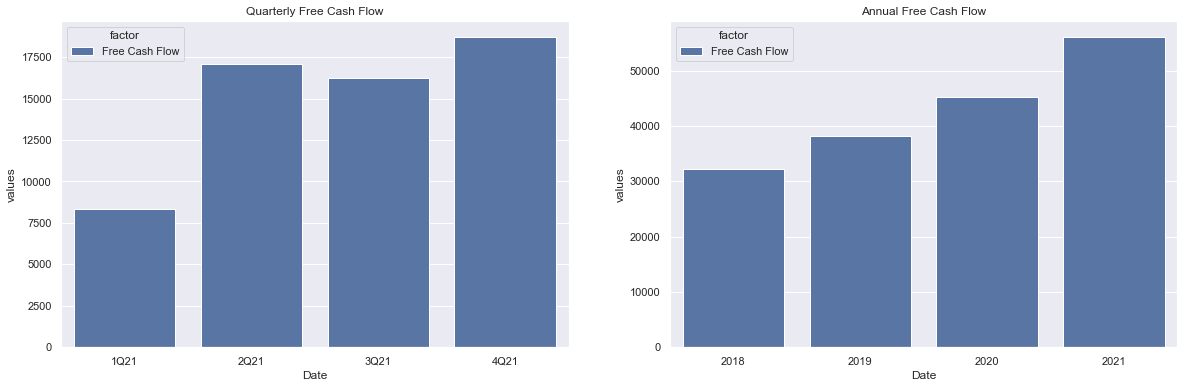

In [562]:
cf_t = cf2.transpose().reset_index().rename(columns={'': 'Date'})
cf_t['Date'] = pd.to_datetime(cf_t['Date'])
cf_t = cf_t.sort_values(by=['Date']).set_index('Date')
cf_t = cf_t[['Free Cash Flow']].stack().reset_index().rename(columns={'level_1': 'factor', 0: 'values'})
cf_t['Date'] = pd.DatetimeIndex(cf_t['Date']).year

cfq_t = cfq2.transpose().reset_index().rename(columns={'': 'Date'})
cfq_t['Date'] = pd.to_datetime(cfq_t['Date'])
cfq_t = cfq_t.sort_values(by=['Date']).set_index('Date')
cfq_t = cfq_t[['Free Cash Flow']].stack().reset_index().rename(columns={'level_1': 'factor', 0: 'values'})
cfq_t['Date'] = ['1Q21','2Q21','3Q21','4Q21']

fig, axs = plt.subplots(ncols=2,figsize=(20,6))


#cf.stack(0)
ax = sns.barplot(hue='factor',x='Date',y='values',data=cf_t,ax=axs[1])
ax.set_title('Annual Free Cash Flow')

#cf.stack(0)
bx = sns.barplot(hue='factor',x='Date',y='values',data=cfq_t,ax=axs[0])
bx.set_title('Quarterly Free Cash Flow')


In [563]:
round((cfq2.pct_change(axis=1,periods=-1)*100),2).filter(items = ['Free Cash Flow'], axis=0)

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Free Cash Flow,15.2,-4.87,104.87,NaN


# Debt

In [564]:
df1 = df1.set_index('Financials')

In [565]:
dt = df1.filter(items = ['totalDebt'], axis=0).values/df1.filter(items = ['Total Stockholder Equity','Total Assets'], axis=0)
dt = dt.rename(index={'Total Stockholder Equity': 'Debt to Equity',
                     'Total Assets': 'Debt to Assets'})

In [566]:
fcfy = (cf2.iloc[:,:1].filter(items = ['Free Cash Flow'], axis=0).values*1000000/df1.filter(items = ['enterpriseValue'], axis=0))*100
fcfy = fcfy.rename(index={'enterpriseValue': 'FCF Yield-EV'})

In [567]:
fcfy2 = (cf2.iloc[:,:1].filter(items = ['Free Cash Flow'], axis=0).values*1000000/df1.filter(items = ['marketCap'], axis=0))*100
fcfy2 = fcfy2.rename(index={'marketCap': 'FCF Yield-MarketCap'})

In [568]:
df1 = df1.append([dt,fcfy,fcfy2])

In [569]:
fi= round(int(df1.filter(items = ['totalDebt'], axis=0).reset_index(drop=True).values[0])/(f.filter(items = [
    'Total Stockholder Equity'
    ,'Total Assets'], axis=0).rename(index={'Total Stockholder Equity': 'Debt to Equity',
'Total Assets': 'Debt to Assets'})*1000000),2)


In [570]:
df1.filter(items = ['marketCap'], axis=0)/1000000000

,Fundamentals
Financials,
marketCap,"2,498.35552768"


In [571]:
bs.iloc[[-1]].append(fi)

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Quick Ratio,205.03,248.96,249.91,285.53
Debt to Equity,0.56,0.67,0.77,0.95
Debt to Assets,0.24,0.26,0.28,0.3


# Profitabilility

In [572]:
print('percent')
pr = round(df1.filter(items = ['profitMargins','grossMargins','operatingMargins','revenueGrowth',
    'earningsGrowth','returnOnAssets','returnOnEquity',
    'trailingEps','revenuePerShare','totalCashPerShare'], axis=0).astype('float'),2).rename(index={
    'profitMargins': 'Profit Margin',
                                                      'grossMargins': 'Gross Margin',
                                                      'operatingMargins': 'Operating Margin',
                                                      'revenueGrowth': 'Revenue Growth',
                                                      'earningsGrowth': 'Earnings Growth',
                                                         'returnOnAssets': 'Return on Assets',
                                                         'returnOnEquity': 'Return on Equity',
                                                         'revenuePerShare': 'Revenue Per Share',
                                                         'trailingEps': 'Earnings Per Share',
                                                         'totalCashPerShare': 'Total Cash Per Share'})
                                                         
pr.iloc[0:7,0:2]=pr.iloc[0:7,0:2]*100
pr.round(2)


percent


,Fundamentals
Financials,
Profit Margin,39.0
Gross Margin,69.0
Operating Margin,42.0
Revenue Growth,22.0
Earnings Growth,49.0
Return on Assets,15.0
Return on Equity,49.0
Earnings Per Share,8.94
Revenue Per Share,23.4


# Valuation

In [573]:
v1 = round(df1.filter(items = ['priceToBook','trailingPE','pegRatio','priceToSalesTrailing12Months'], axis=0),2)

In [574]:
ptcf=df1.filter(items = ['currentPrice'], axis=0).values/df1.filter(items = ['totalCashPerShare'], axis=0)
ptcf = ptcf.rename(index={'totalCashPerShare': 'Price to Cash Flow'})
ptcf= round(ptcf,2)
round(v1.append(ptcf).astype('float'),2).rename(index={'priceToBook': 'Price/Book',
                                                      'trailingPE': 'Price/Earnings',
                                                      'pegRatio': 'Price/Earnings-to-Growth',
                                                      'priceToSalesTrailing12Months': 'Price/Sales'
                                                      })

,Fundamentals
Financials,
Price/Book,16.44
Price/Earnings,37.23
Price/Earnings-to-Growth,2.17
Price/Sales,14.17
Price to Cash Flow,19.13


# Trendline

In [575]:
from datetime import datetime
import plotly.graph_objects as go

In [576]:
wt = t.history()#.#datetime.now()
#wt.filter(like = -1, axis=0)
wt =wt.reset_index(drop=False).iloc[-1]['Date']

In [577]:
date_format = '%Y-%m-%d'
dtObj = datetime.strptime(str(wt)[0:10], date_format)
n = 48
past_date = dtObj - pd.DateOffset(months=n)

In [578]:
tt = t.history(start=past_date,  end=wt).reset_index()

In [579]:
fig = go.Figure(data=[go.Candlestick(x=tt['Date'],
                                   open=tt['Open'],
                                     high=tt['High'],
                                     low=tt['Low'],
                                     close=tt['Close'])])

fig.update_layout(
    title= str(t).replace('yfinance.Ticker object <','').replace('>','') + ' ' +str(t.info['currentPrice']),
   font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f"))

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,)

fig.show()

In [580]:
delta = tt['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

tt['RSI'] = 100 - (100/(1 + rs))

# Skip first 14 days to have real values
ticker = tt.iloc[14:]

# RSI

RSI: 51.42


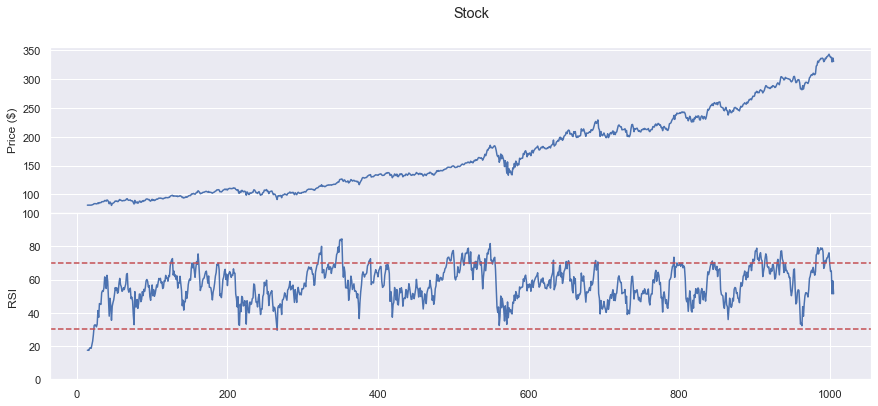

In [581]:

print(f"RSI: {ticker.iloc[-1,-1].round(2)}") 

fig, (ax1, ax2) = plt.subplots(2)
ax1.get_xaxis().set_visible(False)
fig.suptitle('Stock')

ticker['Close'].plot(ax=ax1)
ax1.set_ylabel('Price ($)')
ticker['RSI'].plot(ax=ax2)
ax2.set_ylim(0,100)
ax2.axhline(30, color='r', linestyle='--')
ax2.axhline(70, color='r', linestyle='--')
ax2.set_ylabel('RSI')
fig.set_size_inches(15, 7)
plt.subplots_adjust(left=0.11, bottom=0.24, right=0.87, top=0.90, wspace=0.2, hspace=0)
plt.show()